<a href="https://colab.research.google.com/github/Hj-lh/TuwaiqChallenge/blob/main/TUWAIQ_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



In [227]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
df

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,SWPS,NaN,NaN,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.40,5.0,NaN,NaN,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,NaN,مبتدئ,...,نعم,البكالوريوس,علوم الحاسب,NaN,4.46,5.0,موظف,NaN,NaN,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,تقليدية,مبتدئ,...,لا,البكالوريوس,نظم المعلومات,تكنولوجيا الاتصالات والمعلومات,4.93,5.0,موظف,دوام كامل,Yes,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,NaN,متوسط,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.00,4.0,غير موظف,تدريب,No,0


In [228]:
df.describe()

,Age,Program Days,University Degree Score,University Degree Score System,Y
count,6456.000000,6548.000000,6467.000000,6467.000000,6548.000000
mean,26.831165,19.691662,8.224432,9.773929,0.158674
std,5.535967,32.112061,19.120384,21.259962,0.365400
min,18.000000,3.000000,0.000000,4.000000,0.000000
25%,23.000000,5.000000,3.300000,5.000000,0.000000
50%,25.000000,12.000000,4.000000,5.000000,0.000000
75%,29.000000,19.000000,4.510000,5.000000,0.000000
max,57.000000,292.000000,100.000000,100.000000,1.000000


In [229]:
nullValues = df.isnull().sum()
print(nullValues)

Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64


In [230]:
columnToDrob =['Program Sub Category Code','Technology Type', 'Program Skill Level', 'College','Job Type','Still Working']
df_cleaned = df.drop(columns=columnToDrob, axis=1)
test_cleaned = test.drop(columns=columnToDrob, axis=1)

df_cleaned

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Presentation Method,Program Start Date,Program End Date,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,حضوري,2023-05-28,2023-06-08,12,نعم,البكالوريوس,هندسة حاسب الالي,2.44,4.0,غير موظف,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,حضوري,2023-04-02,2023-04-06,5,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,5.00,5.0,طالب,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,حضوري,2023-07-23,2023-09-14,54,نعم,البكالوريوس,Information Technology,3.50,5.0,موظف,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,حضوري,2023-07-23,2023-08-24,33,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),3.55,5.0,خريج,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,حضوري,2023-04-30,2023-06-22,54,لا,البكالوريوس,نظم المعلومات الحاسوبية,4.00,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,حضوري,2023-04-02,2023-06-06,66,نعم,البكالوريوس,تقنية المعلومات,4.40,5.0,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,عن بعد,2023-05-14,2023-05-25,12,نعم,البكالوريوس,علوم الحاسب,4.46,5.0,موظف,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,حضوري,2023-07-16,2023-07-20,5,لا,البكالوريوس,نظم المعلومات,4.93,5.0,موظف,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,حضوري,2024-01-07,2024-01-18,12,نعم,البكالوريوس,تقنية المعلومات,4.00,4.0,غير موظف,0


In [231]:
print(df_cleaned.isnull().sum())

Student ID                          0
Age                                92
Gender                              0
Home Region                         2
Home City                           2
Program ID                          0
Program Main Category Code          0
Program Presentation Method         0
Program Start Date                  0
Program End Date                    0
Program Days                        0
Completed Degree                    0
Level of Education                 26
Education Speaciality             277
University Degree Score            81
University Degree Score System     81
Employment Status                 566
Y                                   0
dtype: int64


In [232]:
age_median = df_cleaned['Age'].median()
df_cleaned['Age'] = df_cleaned['Age'].fillna(age_median)

df_cleaned['Level of Education'] = test_cleaned['Level of Education'].fillna('البكالوريوس')

age_median1 = test_cleaned['Age'].median()
test_cleaned['Age'] = test_cleaned['Age'].fillna(age_median1)
test_cleaned['Level of Education'] = test_cleaned['Level of Education'].fillna('البكالوريوس')



In [233]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned['Education Speaciality'] = mode_imputer.fit_transform(df_cleaned[['Education Speaciality']])
test_cleaned['Education Speaciality'] = mode_imputer.fit_transform(test_cleaned[['Education Speaciality']])

median_imputer = SimpleImputer(strategy='median')
df_cleaned['University Degree Score'] = median_imputer.fit_transform(df_cleaned[['University Degree Score']])
df_cleaned['University Degree Score System'] = median_imputer.fit_transform(df_cleaned[['University Degree Score System']])
test_cleaned['University Degree Score'] = median_imputer.fit_transform(test_cleaned[['University Degree Score']])
test_cleaned['University Degree Score System'] = median_imputer.fit_transform(test_cleaned[['University Degree Score System']])

In [234]:

df_cleaned['Employment Status'] = mode_imputer.fit_transform(df_cleaned[['Employment Status']])
test_cleaned['Employment Status'] = mode_imputer.fit_transform(test_cleaned[['Employment Status']])

# Fill missing values in the Employment Status column with the most frequent value


test_cleaned['Home Region'] = test_cleaned['Home Region'].fillna('منطقة الرياض')
test_cleaned['Home City'] = test_cleaned['Home City'].fillna('الرياض')
df_cleaned['Home Region'] = df_cleaned['Home Region'].fillna('منطقة الرياض')
df_cleaned['Home City'] = df_cleaned['Home City'].fillna('الرياض')

In [235]:

print(test_cleaned.isnull().sum())

Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Home City                         0
Program ID                        0
Program Main Category Code        0
Program Presentation Method       0
Program Start Date                0
Program End Date                  0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
dtype: int64


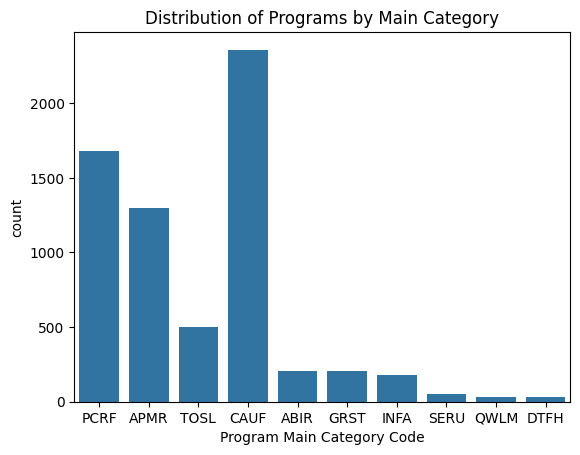

In [236]:
sns.countplot(x='Program Main Category Code', data=df_cleaned)
plt.title('Distribution of Programs by Main Category')
plt.show()

In [163]:
pip install python-bidi


In [164]:
pip install arabic-reshaper


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

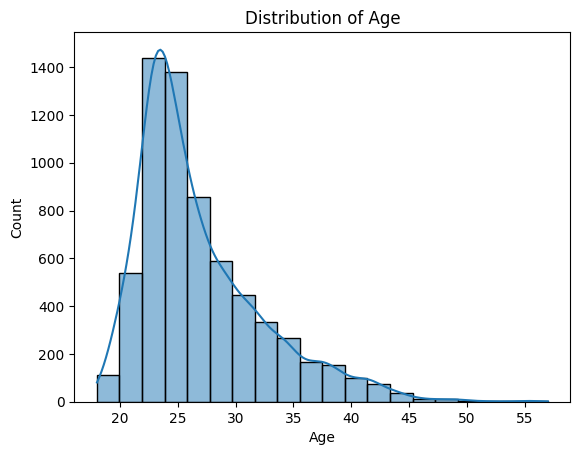

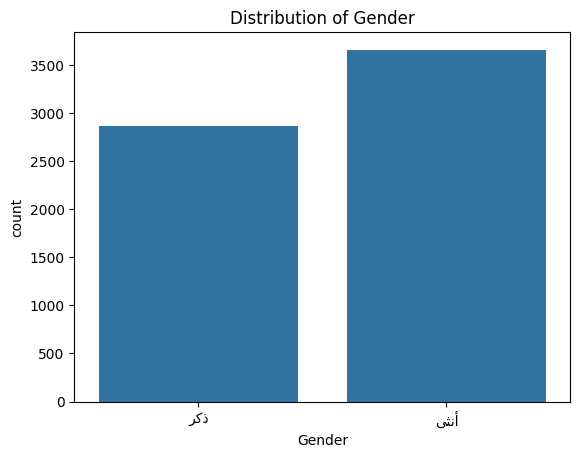

In [166]:
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()
# df_cleaned['Gender'] contains Arabic text
sns.countplot(x=df_cleaned['Gender'].apply(lambda x: get_display(arabic_reshaper.reshape(x))))
plt.title('Distribution of Gender')
plt.show()

Start Date Range: (Timestamp('2022-06-05 00:00:00'), Timestamp('2024-01-15 00:00:00'))
End Date Range: (Timestamp('2022-06-09 00:00:00'), Timestamp('2024-01-25 00:00:00'))

Sample Durations:
0   11 days
1    4 days
2   53 days
3   32 days
4   53 days
Name: Duration, dtype: timedelta64[ns]

Start Date Frequency:
2023-04-02    345
2023-07-23    298
2023-07-16    267
2023-05-14    265
2023-03-05    246
Name: Program Start Date, dtype: int64


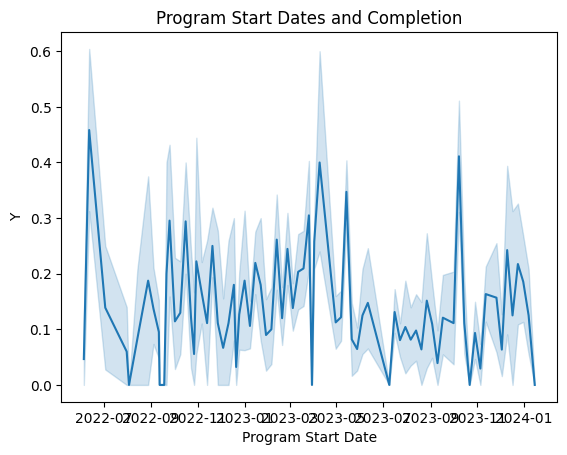

In [237]:
df_cleaned['Program Start Date'] = pd.to_datetime(df_cleaned['Program Start Date'])
df_cleaned['Program End Date'] = pd.to_datetime(df_cleaned['Program End Date'])

test_cleaned['Program Start Date'] = pd.to_datetime(test_cleaned['Program Start Date'])
test_cleaned['Program End Date'] = pd.to_datetime(test_cleaned['Program End Date'])

# Basic Analysis
## Range
start_date_range = df_cleaned['Program Start Date'].min(), df_cleaned['Program Start Date'].max()
end_date_range = df_cleaned['Program End Date'].min(), df_cleaned['Program End Date'].max()

start_date_range1 = test_cleaned['Program Start Date'].min(), test_cleaned['Program Start Date'].max()
end_date_range1 = test_cleaned['Program End Date'].min(), test_cleaned['Program End Date'].max()
## Duration
df_cleaned['Duration'] = df_cleaned['Program End Date'] - df_cleaned['Program Start Date']
test_cleaned['Duration'] = test_cleaned['Program End Date'] - test_cleaned['Program Start Date']

## Frequency (Example: Count how many times each start date appears)
start_date_frequency = df_cleaned['Program Start Date'].value_counts()

print(f"Start Date Range: {start_date_range}")
print(f"End Date Range: {end_date_range}")
print(f"\nSample Durations:\n{df_cleaned['Duration'].head()}")
print(f"\nStart Date Frequency:\n{start_date_frequency.head()}")
sns.lineplot(x='Program Start Date', y='Y', data=df_cleaned)
plt.title('Program Start Dates and Completion')
plt.show()

In [238]:
sns.countplot(x=df_cleaned['Level of Education'].apply(lambda x: get_display(arabic_reshaper.reshape(x))),hue='Y', data=df_cleaned)
plt.title('Education Level and Program Completion')
plt.show()

sns.countplot(x=df_cleaned['Employment Status'].apply(lambda x: get_display(arabic_reshaper.reshape(x))), hue='Y', data=df_cleaned)
plt.title('Emplyment Status and program completation')
plt.show()

TypeError: 'float' object is not iterable

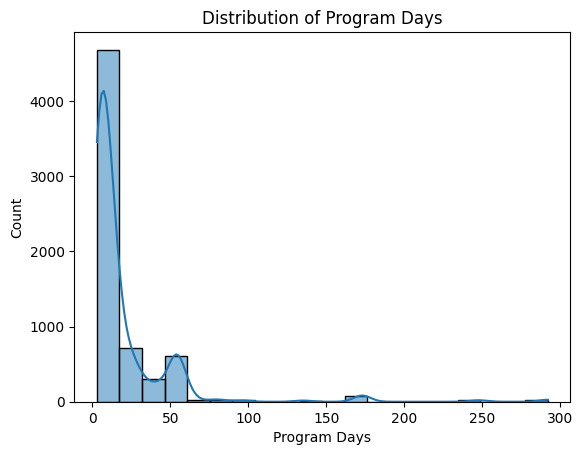

In [169]:
sns.histplot(df_cleaned['Program Days'], bins=20, kde=True)
plt.title('Distribution of Program Days')
plt.show()

In [216]:
test_cleaned.columns


Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Duration'],
      dtype='object')

In [217]:
df_cleaned.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Y', 'Duration'],
      dtype='object')

In [239]:
categorical_columns = [ 'Gender', 'Home Region', 'Home City',
       'Program Main Category Code', 'Program Presentation Method',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status',]

# Iterate through each categorical column and one-hot encode
for col in categorical_columns:
    one_hot = pd.get_dummies(df_cleaned[col], prefix=col)
    df_cleaned = pd.concat([df_cleaned, one_hot], axis=1)
    df_cleaned.drop(col, axis=1, inplace=True)
    one_hot = pd.get_dummies(test_cleaned[col], prefix=col)
    test_cleaned = pd.concat([test_cleaned, one_hot], axis=1)
    test_cleaned.drop(col, axis=1, inplace=True)
df_cleaned

,Student ID,Age,Program ID,Program Start Date,Program End Date,Program Days,Y,Duration,Gender_أنثى,Gender_ذكر,...,University Degree Score_100.0,University Degree Score System_4.0,University Degree Score System_5.0,University Degree Score System_100.0,Employment Status_خريج,Employment Status_طالب,Employment Status_عمل حر,Employment Status_غير موظف,Employment Status_موظف,Employment Status_موظف - طالب
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,453686d8-4023-4506-b2df-fac8b059ac26,2023-05-28,2023-06-08,12,0,11 days,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,2023-04-02,2023-04-06,5,0,4 days,0,1,...,0,0,1,0,0,1,0,0,0,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,2023-07-23,2023-09-14,54,0,53 days,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,2023-07-23,2023-08-24,33,0,32 days,0,1,...,0,0,1,0,1,0,0,0,0,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,d32da0e9-1aed-48c3-992d-a22f9ccc741e,2023-04-30,2023-06-22,54,0,53 days,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,4f8c696a-b783-4d40-9776-105f6d3bd624,2023-04-02,2023-06-06,66,0,65 days,1,0,...,0,0,1,0,0,0,0,0,1,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,e94942dd-8684-4746-97ae-df567b9b0a4a,2023-05-14,2023-05-25,12,0,11 days,1,0,...,0,0,1,0,0,0,0,0,1,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,2023-07-16,2023-07-20,5,1,4 days,1,0,...,0,0,1,0,0,0,0,0,1,0
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,2024-01-07,2024-01-18,12,0,11 days,0,1,...,0,1,0,0,0,0,0,1,0,0


In [240]:
columnToDrob =['Program ID','Student ID','Program Start Date','Program End Date']
columnToDrob1 =['Program ID','Program Start Date','Program End Date']

df_cleaned = df_cleaned.drop(columns=columnToDrob, axis=1)
test_cleaned = test_cleaned.drop(columns=columnToDrob1, axis=1)

df_cleaned

,Age,Program Days,Y,Duration,Gender_أنثى,Gender_ذكر,Home Region_المنطقة الشرقية,Home Region_منطقة الباحة,Home Region_منطقة الجوف,Home Region_منطقة الحدود الشمالية,...,University Degree Score_100.0,University Degree Score System_4.0,University Degree Score System_5.0,University Degree Score System_100.0,Employment Status_خريج,Employment Status_طالب,Employment Status_عمل حر,Employment Status_غير موظف,Employment Status_موظف,Employment Status_موظف - طالب
0,37.0,12,0,11 days,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,21.0,5,0,4 days,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,24.0,54,0,53 days,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,23.0,33,0,32 days,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,23.0,54,0,53 days,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,31.0,66,0,65 days,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6544,27.0,12,0,11 days,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6545,24.0,5,1,4 days,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6546,25.0,12,0,11 days,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [241]:
for column in df_cleaned.columns:
    print(column)


Age
Program Days
Y
Duration
Gender_أنثى
Gender_ذكر
Home Region_المنطقة الشرقية
Home Region_منطقة الباحة
Home Region_منطقة الجوف
Home Region_منطقة الحدود الشمالية
Home Region_منطقة الرياض
Home Region_منطقة القصيم
Home Region_منطقة المدينة المنورة
Home Region_منطقة تبوك
Home Region_منطقة جازان
Home Region_منطقة حائل
Home Region_منطقة عسير
Home Region_منطقة مكة المكرمة
Home Region_منطقة نجران
Home City_أبها
Home City_أبو عريش
Home City_أحد المسارحة
Home City_أحد رفيدة
Home City_أملج
Home City_ابها
Home City_الأحساء
Home City_الباحة
Home City_البدائع
Home City_البكيرية
Home City_الجبيل
Home City_الجموم
Home City_الحريملاء
Home City_الحناكية
Home City_الخبر
Home City_الخرج
Home City_الخفجي
Home City_الدرب
Home City_الدرعية
Home City_الدلم
Home City_الدمام
Home City_الدوادمي
Home City_الرس
Home City_الرياض
Home City_الزلفي
Home City_الطائف
Home City_الظهران
Home City_العاصمة المقدسة
Home City_العرضيات
Home City_العلا
Home City_الغاط
Home City_القرى
Home City_القريات
Home City_القطيف
Home Cit

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = df_cleaned.drop('Y', axis=1)
y = df_cleaned['Y']
X_train, X_val, y_train, y_val = train_test_split(X, df_cleaned["Y"], test_size=0.2, random_state=42)
for col in X_train.columns:
    if X_train[col].dtype == 'timedelta64[ns]':
        X_train[col] = X_train[col].dt.total_seconds()
        X_val[col] = X_val[col].dt.total_seconds()

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions, average='macro')

print(f"Validation Accuracy: {accuracy}")
print(f"Validation F1 Score: {f1}")
print(classification_report(y_val, val_predictions))



Validation Accuracy: 0.8923664122137405
Validation F1 Score: 0.7766102961718616
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1118
           1       0.65      0.59      0.62       192

    accuracy                           0.89      1310
   macro avg       0.79      0.77      0.78      1310
weighted avg       0.89      0.89      0.89      1310



In [243]:
# Align the test dataset columns to match the training dataset
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)


In [244]:
for col in test_cleaned.columns:
    if test_cleaned[col].dtype == 'timedelta64[ns]':
        test_cleaned[col] = test_cleaned[col].dt.total_seconds()

X_test = test_cleaned.drop('Student ID', axis=1)  # Assuming 'ID' is the column you don't want to include in the prediction
predictions_test = model.predict(X_test_aligned)


In [247]:
print(test_cleaned.shape)
print(df_cleaned.shape)


(818, 553)
(6548, 1446)


In [249]:
# Creating a submission DataFrame
submission = pd.DataFrame({
    'ID': list(range(1,test_cleaned.shape[0]+1)),  # Make sure this is the exact name of the column in your test dataset
    'Y': predictions_test
})

# Saving the submission file
submission.to_csv('submission.csv', index=False)
submission


,ID,Y
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
813,814,0
814,815,0
815,816,0
816,817,1


In [140]:
#try diffrence features
feature_importances = model.feature_importances_
feature_names = X_train.columns
feature_imp_dict = dict(zip(feature_names, feature_importances))
sorted_features = sorted(feature_imp_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Completed Degree_لا: 0.11493559585199228
Completed Degree_نعم: 0.09773409224729278
Age: 0.055709731819734945
Duration: 0.046274857472941994
Program Days: 0.04506365100024833
Program Main Category Code_CAUF: 0.013501269923605523
Program Main Category Code_PCRF: 0.012767965684907037
Gender_أنثى: 0.011923843704252363
Gender_ذكر: 0.011689886498791841
University Degree Score_4.0: 0.011684883201073248
Employment Status_موظف: 0.011386672140654417
Education Speaciality_علوم الحاسبات: 0.01138497823330239
Program Presentation Method_حضوري: 0.011082482915764915
Program Presentation Method_عن بعد: 0.009910501058875252
Program Main Category Code_APMR: 0.009832836771269907
Employment Status_طالب: 0.0094598710460684
Employment Status_غير موظف: 0.00930855658123321
University Degree Score System_5.0: 0.009252702928043642
University Degree Score_3.0: 0.008523343148463458
Education Speaciality_تقنية المعلومات: 0.0079105314801751
University Degree Score System_4.0: 0.007753789974062006
Education Speaciali

In [141]:
features_to_drop = [
    "Home City_الحريملاء", "Home City_بني حسن", "Home City_تربة", "Home City_حوطة بني تميم",
    "Home City_سراة عبيدة", "Home City_ظهران الجنوب", "Education Speaciality_(IT) Information Technology",
    "Education Speaciality_Advanced Computer Science", "Education Speaciality_BEng Computer Systems Engineering",
    "Education Speaciality_Business", "Education Speaciality_CIS", "Education Speaciality_Computer Information Systym",
    "Education Speaciality_Computer Network and Communication", "Education Speaciality_Computer Scince",
    "Education Speaciality_Computer and Information Systems", "Education Speaciality_Computer science and information",
    "Education Speaciality_Data science", "Education Speaciality_Database and programming",
    "Education Speaciality_ENGINEER IN MARINE TECHNOLOGY", "Education Speaciality_Electrical engineer",
    "Education Speaciality_Engineering of computer network systems support", "Education Speaciality_English Language and Literature",
    "Education Speaciality_Health Information Management and Technology", "Education Speaciality_INTER-IoT",
    "Education Speaciality_IT:health care informatics", "Education Speaciality_Information system computing",
    "Education Speaciality_Information technology - cybersecurity", "Education Speaciality_MBA",
    "Education Speaciality_Management Information Systmes", "Education Speaciality_Network telecommunication systems",
    "Education Speaciality_Physics", "Education Speaciality_Softeare Engineering",
    "Education Speaciality_Software system engineering", "Education Speaciality_art education",
    "Education Speaciality_electrical engineering", "Education Speaciality_language and translation",
    "Education Speaciality_آداب إنجليزي", "Education Speaciality_أصول الدين", "Education Speaciality_أنظمة الاتصالات",
    "Education Speaciality_إدارة انظمة شبكات", "Education Speaciality_إلكترونيات", "Education Speaciality_اتصلات وتقنية معلومات",
    "Education Speaciality_احصاء تطبيقي", "Education Speaciality_احياء", "Education Speaciality_ادارة الموارد ح",
    "Education Speaciality_ادارة فعاليات", "Education Speaciality_اداره عامه", "Education Speaciality_اعلان واتصال تسويقي",
    "Education Speaciality_الأمن السيبراني والتحري الرقمي", "Education Speaciality_البرمجه",
    "Education Speaciality_التربية الإسلامية", "Education Speaciality_التسويق", "Education Speaciality_التوجية والاصلاح الاسري",
    "Education Speaciality_الحوسبة الكمية", "Education Speaciality_الدراسات الإسلامية المعاصرة",
    "Education Speaciality_الشبكات وامن البيانات", "Education Speaciality_العلوم الإنسانية",
    "Education Speaciality_الهندسة الميكانيكية (علوم)", "Education Speaciality_امن سيبراني وتحري رقمي",
    "Education Speaciality_برمجيات حاسب", "Education Speaciality_بكالوريوس في هندسة البرمجيات",
    "Education Speaciality_تجارة إلكترونية", "Education Speaciality_تحضيري علمي", "Education Speaciality_تصميم الازياء",
    "Education Speaciality_تصميم داخلي", "Education Speaciality_تصميم منتحات", "Education Speaciality_تقنيات الحاسب /برمجيات",
    "Education Speaciality_تقنية المعلومات - مسار الذكاء الاصطناعي", "Education Speaciality_تقنية المعلومات مسار الامن السيبراني",
    "Education Speaciality_تقنية طبية", "Education Speaciality_تقنية معلزمات", "Education Speaciality_تقنية معلومات (IT)",
    "Education Speaciality_تقنية معلومات- امن سيبراني", "Education Speaciality_تقنيه معلومات(لسى طالبه جامعيه بحط موعد تخرجي المتوقع ، شهاده الثانوي تخرجت بمعدل تراكمي ٩٨)",
    "Education Speaciality_تكنولوجيا ترجمة", "Education Speaciality_تكنولوجيا طبية حيوية", "Education Speaciality_حاسب آلي تربوي",
    "Education Speaciality_حاسب الي برمجيات", "Education Speaciality_حاسب الي و نظم المعلومات", "Education Speaciality_حاسب الي وسكرتارية",
    "Education Speaciality_حوسبة و ادارة اعمال", "Education Speaciality_دراسات اسلامية", "Education Speaciality_رياضيات مسار إحصاء",
    "Education Speaciality_رياضيات واحصاء", "Education Speaciality_شبكات وعلوم الحاسب الالي", "Education Speaciality_صيدلة",
    "Education Speaciality_علم بيانات", "Education Speaciality_علوح حاسب", "Education Speaciality_علوم أسرية",
    "Education Speaciality_علوم الحاسب لكن خبرتي العمليه ليست قوية", "Education Speaciality_علوم الحاسبب",
    "Education Speaciality_علوم حاسبات وتقنية معلومات", "Education Speaciality_علوم وهندسة الحاسب - ذكاء اصطناعي",
    "Education Speaciality_فنون بصرية ( نحت )", "Education Speaciality_مختبرات كيميائية", "Education Speaciality_مساحة بحرية",
    "Education Speaciality_مهندس انظمة شبكات", "Education Speaciality_موارد بشرية", "Education Speaciality_نحت، فنون بصرية",
    "Education Speaciality_نطم المعلومات", "Education Speaciality_نظم إدارية", "Education Speaciality_نظم المعلومات Information System",
    "Education Speaciality_نظم المعلومات الاداريه", "Education Speaciality_نظم المعلومات مسار علم بيانات", "Education Speaciality_نظم معلومات الادارية",
    "Education Speaciality_نظم معلومات الاداريه", "Education Speaciality_نظم معلومات تطبيقي", "Education Speaciality_نظم معلومات حاسب الي",
    "Education Speaciality_نظم معلومات حاسب مسار امن سيبراني", "Education Speaciality_هندسة الكترونية - جامعة سيري بريطانيا",
    "Education Speaciality_هندسة تقنية", "Education Speaciality_هندسة حاسب آلي و شبكات", "Education Speaciality_هندسة حاسوب",
    "Education Speaciality_هندسة دعم أنظمة الشبكات", "Education Speaciality_هندسة شبكات وامن معلومات", "Education Speaciality_وسائط متعددة تفاعلية",
    "University Degree Score_1.19", "University Degree Score_1.43", "University Degree Score_1.8", "University Degree Score_2.383",
    "University Degree Score_2.39", "University Degree Score_2.68", "University Degree Score_3.02", "University Degree Score_3.338",
    "University Degree Score_3.588", "University Degree Score_4.061", "University Degree Score_80.92", "University Degree Score_81.0",
    "University Degree Score_85.61", "University Degree Score_85.81", "University Degree Score_88.65", "University Degree Score_95.3",
    "University Degree Score_98.6", "University Degree Score_98.75", "University Degree Score_98.83", "University Degree Score_99.6"
]

# Now, you can drop these columns from your DataFrame
X_dropped = X.drop(features_to_drop, axis=1)
X_train_dropped, X_val_dropped, y_train, y_val = train_test_split(X_dropped, df_cleaned['Y'], test_size=0.2, random_state=42)

for col in X_train_dropped.columns:
    if X_train_dropped[col].dtype == 'timedelta64[ns]':
        X_train_dropped[col] = X_train_dropped[col].dt.total_seconds()
        X_val_dropped[col] = X_val_dropped[col].dt.total_seconds()


In [142]:
model.fit(X_train_dropped, y_train)
val_predictions_dropped = model.predict(X_val_dropped)

accuracy_dropped = accuracy_score(y_val, val_predictions_dropped)
f1_dropped = f1_score(y_val, val_predictions_dropped, average='macro')

print(f"Validation Accuracy after dropping features: {accuracy_dropped}")
print(f"Validation F1 Score after dropping features: {f1_dropped}")


Validation Accuracy after dropping features: 0.8781609195402299
Validation F1 Score after dropping features: 0.7524295302013424


That gave us less accuracy, so we will stick with the previous model.






